In [1]:
%load_ext autoreload
%autoreload

In [2]:
from utils_v1 import *


In [3]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import sys
import numpy as np
from src.dataset import (
    MultipleDates,
    PAMultipleDates,
    MTMultipleDates,
    MAMultipleDates,
    MSMultipleDates,
    PIMultipleDates,
    MOMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.manager.multioutput import ManagerMCDropout, ManagerSingleRun, ManagerEnsemble, ManagerEvidential2
from src.Logger import Logger


Tensorflow ver. 2.6.0


In [4]:
ic.configureOutput(includeContext=True)

In [5]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [6]:
config = {
	"training": False,
	"inferring": True,
	"site": "MO", # values: MT, PA, MS, PI
	"training_date": "earlier", # values: earlier, current
	"mode": "ensemble", # values: mcd, single_run, ensemble, evidential2
	"uncertainty_method": "pred_var", # pred_var MI pred_entropy KL pred_entropy_single
	"loadInference": False,
	"removePolygons": True,
	"plotLandsat": False,
	"plotPOI": False,

	"save_probabilities": False,
	"addPastDeforestationInput": True,
	"classes_mode": False,
	"learning_rate": 1e-4,
    "use_cloud_mask": False,
    "mask_out_non_biome": False
}

In [7]:



if config['mode'] == 'mcd':
	managerClass = ManagerMCDropout
	config['inference_times'] = 10
	config['training_times'] = 1
elif config['mode'] == 'single_run':
	managerClass = ManagerSingleRun
	config['inference_times'] = 1
	config['training_times'] = 1
	config['uncertainty_method'] = 'pred_entropy_single'
elif config['mode'] == 'ensemble':
	managerClass = ManagerEnsemble
	config['inference_times'] = 10
	config['training_times'] = 10
elif config['mode'] == 'evidential2':
	managerClass = ManagerEvidential2
	config['inference_times'] = 1
	config['training_times'] = 1
else:
	raise ValueError('Invalid mode')

print(config)

if config['site'] == 'PA':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2017, 2018]
	else:
		dates = [2018, 2019]
	datasetClass = PAMultipleDates
elif config['site'] == 'MT':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MTMultipleDates
elif config['site'] == 'MS':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MSMultipleDates
elif config['site'] == 'PI':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = PIMultipleDates
	config['mask_out_non_biome'] = True
elif config['site'] == 'PI':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = PIMultipleDates
elif config['site'] == 'MO':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]
	datasetClass = MOMultipleDates

else:
	raise ValueError('Invalid site')

dataset = datasetClass(config = config,
			   dates = dates, 
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()



if config['training'] == False:

	if type(dataset) == PAMultipleDates:


		if config['training_date'] == 'current': exp = 0; repetition_id = 0
		elif config['training_date'] == 'earlier': 
			exp = 1; repetition_id = 7
			exp = 20; repetition_id = 0
		 
	elif type(dataset) == MTMultipleDates:
		
		if config['training_date'] == 'current': exp = 2; repetition_id = 8
		elif config['training_date'] == 'earlier': exp = 3; repetition_id = 6		

	elif type(dataset) == MSMultipleDates:

		if config['training_date'] == 'current': exp = 4; repetition_id = 0
		elif config['training_date'] == 'earlier': 
			# exp = 5; repetition_id = 0		
			exp = 18; repetition_id = 0

	elif type(dataset) == PIMultipleDates:

		if config['training_date'] == 'current': exp = 6; repetition_id = 0
		elif config['training_date'] == 'earlier': 
			exp = 7; repetition_id = 0	
			exp = 18; repetition_id = 0	
	elif type(dataset) == MOMultipleDates:

		if config['training_date'] == 'current': exp = 6; repetition_id = 0
		elif config['training_date'] == 'earlier': 
			exp = 7; repetition_id = 0	
			exp = 19; repetition_id = 0	

else:

	exp = 19
	repetition_id = 0
	
logger = Logger()
manager = managerClass(config, dataset, patchesHandler, logger)
manager.defineExperiment(exp)


{'training': False, 'inferring': True, 'site': 'MO', 'training_date': 'earlier', 'mode': 'ensemble', 'uncertainty_method': 'pred_var', 'loadInference': False, 'removePolygons': True, 'plotLandsat': False, 'plotPOI': False, 'save_probabilities': False, 'addPastDeforestationInput': True, 'classes_mode': False, 'learning_rate': 0.0001, 'use_cloud_mask': False, 'mask_out_non_biome': False, 'inference_times': 10, 'training_times': 10}


ic| dataset.py:463 in __init__()- list(self.date_ids): [0]
ic| dataset.py:484 in __init__()
    self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8]]
ic| patchesHandler.py:166 in __init__()- self.input_image_shape: 9
ic| patchesHandler.py:167 in __init__()
    self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8]]


In [8]:
dates

[2019, 2020]

In [9]:
manager.config

{'training': False,
 'inferring': True,
 'site': 'MO',
 'training_date': 'earlier',
 'mode': 'ensemble',
 'uncertainty_method': 'pred_var',
 'loadInference': False,
 'removePolygons': True,
 'plotLandsat': False,
 'plotPOI': False,
 'save_probabilities': False,
 'addPastDeforestationInput': True,
 'classes_mode': False,
 'learning_rate': 0.0001,
 'use_cloud_mask': False,
 'mask_out_non_biome': False,
 'inference_times': 10,
 'training_times': 10,
 'dropout_training': False}

In [10]:
exp

19

In [11]:
manager.setExperimentPath()
manager.createLogFolders()

In [12]:
# ic(type(dataset), exp, dataset.dates)


In [13]:

manager.loadLabel()

D:/Jorge/datasets/deforestation/MO/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:561 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([305558736,   6334361,  18633582,   7843084,  10027746,   8512313,
                                                                     10416766,   5492475,   5785578,   2926723,   3841228,   3672556,
                                                                      1961590,   2715446,   5201407,   4495646], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| dataset.py:564 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([305558736,   6334361,  18633582,   7843084,  10027746,   8512313,
                                                                     10416766,   5492475,   5785578,   2926723,   3841228,   3672556,
                                                                      1961590,   2715446,   5201407,   4495646], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:568 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([305558736,   6334361,  18633582,   7843084,  10027746,   8512313,
                                                                     10416766,   5492475,   5785578,   2926723,   3841228,   3672556,
                                                                      1961590,   2715446,   5201407,   4495646], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MO/deforestation_before_2000_MO.tif


ic| dataset.py:572 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 208], dtype=uint8), array([365488447,  37930790], dtype=int64))
ic| dataset.py:574 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([305558736,   6334361,  18633582,   7843084,  10027746,   8512313,
                                                                     10416766,   5492475,   5785578,   2926723,   3841228,   3672556,
                                                                      1961590,   2715446,   5201407,   4495646], dtype=int64))
ic| dataset.py:553 in loadLabel()
    label_per_date.shape: (19357, 20841, 1)


Removing bufer................
Mask label shape:  
 (19357, 20841, 1) 
 Unique values:  
 [0 1 2]


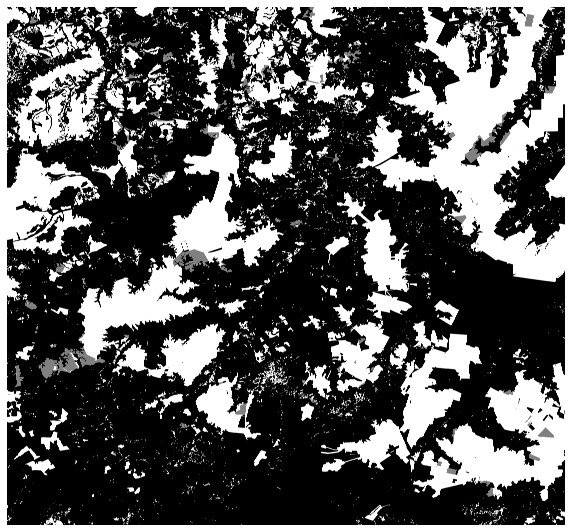

In [14]:
manager.logger.plotFigure(manager.label_mask, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [15]:

# Creating tile mask
manager.createTrainValTestTiles()


Tiles size:  3871 4168
Mask size:  (19355, 20840)


In [16]:
def get_pixel_count_set(label, mask, set_id):
    label_set = label[mask == set_id]
    return np.unique(label_set, return_counts=True)


In [17]:

np.unique(manager.mask_tiles)
for set_id in np.unique(manager.mask_tiles):
    print('Set', set_id, get_pixel_count_set(manager.label_mask, manager.mask_tiles, set_id))


Set 1 (array([0, 1, 2], dtype=uint8), array([8777881,  109936, 7246511], dtype=int64))
Set 2 (array([0, 1, 2], dtype=uint8), array([11876374,   240742,  4017212], dtype=int64))
Set 3 (array([0, 1, 2], dtype=uint8), array([8814930,  372178, 6947220], dtype=int64))
Set 4 (array([0, 1, 2], dtype=uint8), array([12125519,   129779,  3879030], dtype=int64))
Set 5 (array([0, 1, 2], dtype=uint8), array([6369494,  242832, 9522002], dtype=int64))
Set 6 (array([0, 1, 2], dtype=uint8), array([8666245,   36978, 7431105], dtype=int64))
Set 7 (array([0, 1, 2], dtype=uint8), array([11308260,   296390,  4529678], dtype=int64))
Set 8 (array([0, 1, 2], dtype=uint8), array([12499705,    59591,  3575032], dtype=int64))
Set 9 (array([0, 1, 2], dtype=uint8), array([10570927,    49881,  5513520], dtype=int64))
Set 10 (array([0, 1, 2], dtype=uint8), array([6319040,  497675, 9317613], dtype=int64))
Set 11 (array([0, 1, 2], dtype=uint8), array([10885493,   154748,  5094087], dtype=int64))
Set 12 (array([0, 1, 2]

In [18]:

manager.label_mask.dtype

dtype('uint8')

In [19]:

manager.getLabelCurrentDeforestation()

In [20]:

manager.loadInputImage()

ic| dataset.py:504 in loadInputImage()
    image_stack.shape: (19357, 20841, 9)


Image shape:  (19357, 20841, 9)
mask:  (19355, 20840)
image stack:  (19355, 20840, 9)
ref : (19355, 20840, 1)


In [21]:

np.unique(manager.image_stack[...,0], return_counts=True)

(array([0.        , 0.05263158, 0.10526316, 0.15789473, 0.21052632,
        0.2631579 , 0.31578946, 0.36842105, 0.42105263, 0.5263158 ,
        0.6315789 , 0.7368421 , 0.84210527, 0.94736844, 1.        ],
       dtype=float32),
 array([277276238,   2715331,   1961234,   3670842,   3839334,   2926097,
          5784840,   5492094,  10415912,   8511569,  10026607,   7842542,
         18633133,   6334098,  37928329], dtype=int64))

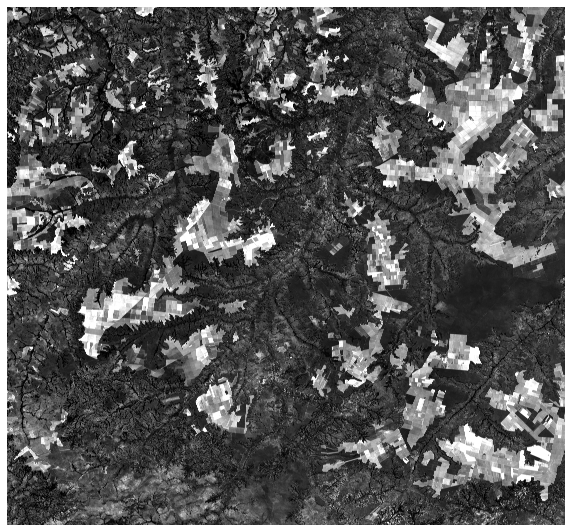

In [22]:

manager.logger.plotFigure(manager.image_stack[...,1], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

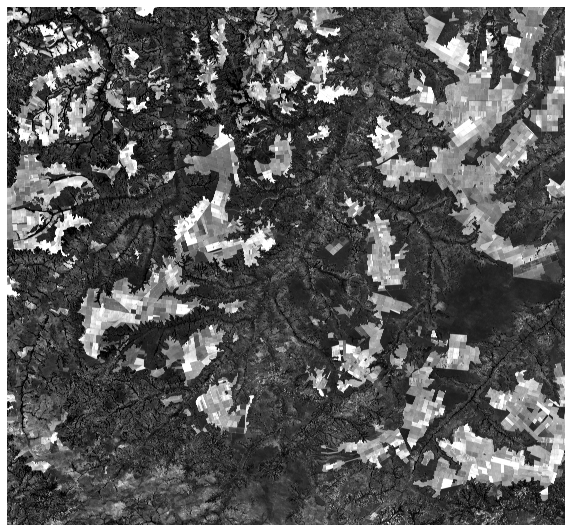

In [23]:

manager.logger.plotFigure(manager.image_stack[...,5], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [24]:
np.unique(manager.label_mask, return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([271682946,   4724849, 126950405], dtype=int64))

In [25]:
# manager.maskNoDataAsNotConsideredClass()

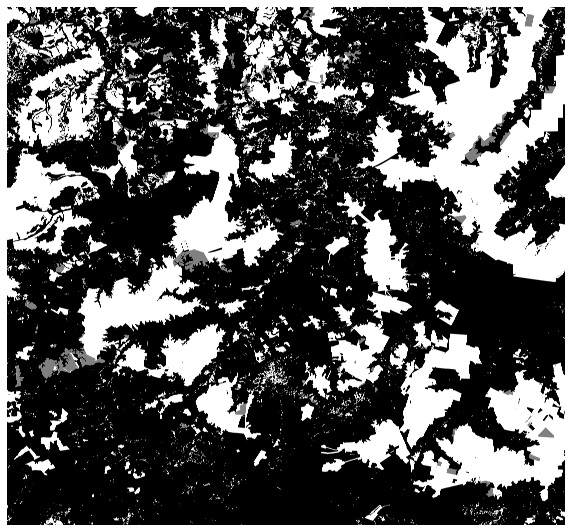

In [26]:

manager.logger.plotFigure(manager.label_mask, 
    name='label_mask', cmap=plt.cm.gray, savefig=False, figsize=(10,10))

In [27]:

manager.getImageChannels()

ic| base.py:111 in getImageChannels()
    self.image_stack.shape: (19355, 20840, 9)
ic| base.py:113 in getImageChannels()- self.channels: 9


In [28]:

manager.getTrainValTestMasks()

Training tiles:  [2, 4, 5, 6, 7, 12, 14, 15, 18, 21, 23, 25]
Validation tiles:  [9, 11, 24]
Test tiles:  [1, 3, 8, 10, 13, 16, 17, 19, 20, 22]


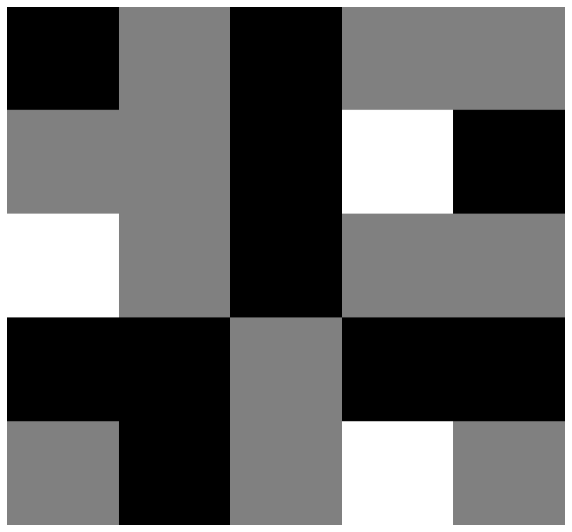

In [29]:
manager.logger.plotFigure(manager.mask_tr_val, 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False, figsize=(10,10))


In [30]:

train_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 1)
val_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 2)
test_unique = get_pixel_count_set(manager.label_mask, manager.mask_tr_val, 0)

total_unique = np.unique(manager.label_mask, return_counts=True)

In [31]:
print("train unique", train_unique)
print("val unique", val_unique)
print("test unique", test_unique)

print("total unique", total_unique)


train unique (array([0, 1, 2], dtype=uint8), array([131587513,   2067270,  59957153], dtype=int64))
val unique (array([0, 1, 2], dtype=uint8), array([32967234,   285589, 15150161], dtype=int64))
test unique (array([0, 1, 2], dtype=uint8), array([107128199,   2371990,  51843091], dtype=int64))
total unique (array([0, 1, 2], dtype=uint8), array([271682946,   4724849, 126950405], dtype=int64))


In [32]:
print("train unique percentage", np.round(train_unique[1]/np.sum(train_unique[1]), 4))
print("val unique", np.round(val_unique[1]/np.sum(val_unique[1]), 4))
print("test unique", np.round(test_unique[1]/np.sum(test_unique[1]), 4))

train unique percentage [0.6796 0.0107 0.3097]
val unique [0.6811 0.0059 0.313 ]
test unique [0.664  0.0147 0.3213]


In [33]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    manager.createIdxImage()


In [34]:
if config["training"] == True:
    manager.extractCoords()

In [35]:
if config["training"] == True:
    manager.trainTestSplit()

In [36]:
if config["training"] == True:
    manager.label_mask.shape

In [37]:
if config["training"] == True:

    manager.logger.plotFigure(manager.label_mask[...,-1], 
        name='Reference', cmap=plt.cm.gray, savefig=False)



In [38]:
if config["training"] == True:
    np.unique(manager.label_mask)

In [39]:
if config["training"] == True:
    print(manager.coords_train)

In [40]:
if config["training"] == True:
    manager.retrieveSamplesOfInterest()

In [41]:
if config["training"] == True:
    inputSnipShow = True

In [42]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [43]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [44]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [45]:
manager.dataset.image_channels

[[0, 1, 2, 3, 4, 5, 6, 7, 8]]

In [46]:
manager.dataset.bands

4

In [47]:
manager.dataset.previewBandsSnip

[[1, 2, 3], [5, 6, 7]]

In [48]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 1000)


In [49]:
if config["training"] == True:
    if inputSnipShow == True:
        manager.snipDataset(idx = 97)


In [50]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 500)

In [51]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

In [52]:
if config["training"] == True:
    if inputSnipShow == True:

        manager.snipDataset(idx = 400)

In [53]:
if config["training"] == True:
    manager.getGenerators()


In [54]:
if config["training"] == True:
    manager.fixChannelNumber()

In [55]:
if config["training"] == True:
    print(manager.path_exp)

In [56]:
if config["training"] == True:
    print(manager.channels)

In [57]:
if config["training"] == True:
    print(manager.image_stack.shape)

In [58]:
if config["training"] == True:
    print("config['training_times']", config["training_times"])

In [59]:
manager.class_n

3

In [60]:
if config["training"] == True:
    for tm in range(config['training_times']):
        manager.repetition_id = tm
        manager.train()

In [61]:
if config["training"] == True:
    manager.plotHistory()


In [62]:
repetition_id = 0

In [63]:
if config["inferring"] != True:
    sys.exit()
else:
    manager.repetition_id = repetition_id

In [64]:
manager.image_stack.shape

(19355, 20840, 9)

In [65]:
manager.patchesHandler.dataset.image_channels[-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [66]:
if issubclass(type(dataset), MultipleDates):
	manager.channels = manager.patchesHandler.input_image_shape
	manager.image_stack = manager.image_stack[..., manager.patchesHandler.dataset.image_channels[-1]]
	manager.label_mask = manager.label_mask[...,-1]


In [67]:
manager.image_stack.shape

(19355, 20840, 9)

In [68]:
manager.setPadding()

-5.0 -24.0


In [69]:
import src.network as network
from tensorflow.keras.models import Model, load_model, Sequential
'''
def infer(self):

    self.h, self.w, self.c = self.image1_pad.shape
    self.c = self.channels
    patch_size_rows = self.h//self.n_rows
    patch_size_cols = self.w//self.n_cols
    num_patches_x = int(self.h/patch_size_rows)
    num_patches_y = int(self.w/patch_size_cols)

    ic(self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5')
    model = load_model(self.path_models+ '/' + self.method +'_'+str(self.repetition_id)+'.h5', compile=False)
    
    if self.classes_mode == False:
        class_n = 3
        self.patchesHandler.class_n = class_n
    else:
        class_n = 2    
        self.patchesHandler.class_n = class_n + 1
    if self.config["loadInference"] == False:
        if self.config["save_probabilities"] == False:
            if self.classes_mode == False:
                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], self.config["inference_times"]), dtype = np.float32)
            else:
                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], class_n, self.config["inference_times"]), dtype = np.float32)

            # self.prob_rec = np.zeros((image1_pad.shape[0],image1_pad.shape[1], class_n, self.config["inference_times"]), dtype = np.float32)
        print("Dropout training mode: {}".format(self.config['dropout_training']))
        new_model = network.build_resunet_dropout_spatial(input_shape=(patch_size_rows,patch_size_cols, self.c), 
            nb_filters = self.nb_filters, n_classes = class_n, dropout_seed = None, training=self.config['dropout_training'])

        for l in range(1, len(model.layers)):
            new_model.layers[l].set_weights(model.layers[l].get_weights())
        
        

        metrics_all =[]
        with tf.device('/cpu:0'):
            for tm in range(0,self.config["inference_times"]):

                print('time: ', tm)

                
                # Recinstructing predicted map
                start_test = time.time()
                
                prob_reconstructed = self.patchesHandler.infer(
                        new_model, self.image1_pad, self.h, self.w, 
                        num_patches_x, num_patches_y, patch_size_rows, 
                        patch_size_cols, classes_mode = self.classes_mode)
                        
                ts_time =  time.time() - start_test

                if self.config["save_probabilities"] == True:
                    np.save(self.path_maps+'/'+'prob_'+str(tm)+'.npy',prob_reconstructed) 
                else:
                    self.prob_rec[...,tm] = prob_reconstructed
                
                metrics_all.append(ts_time)
                del prob_reconstructed
            metrics_ = np.asarray(metrics_all)
            # Saving test time
            np.save(self.path_exp+'/metrics_ts.npy', metrics_)
    del self.image1_pad
'''

'\ndef infer(self):\n\n    self.h, self.w, self.c = self.image1_pad.shape\n    self.c = self.channels\n    patch_size_rows = self.h//self.n_rows\n    patch_size_cols = self.w//self.n_cols\n    num_patches_x = int(self.h/patch_size_rows)\n    num_patches_y = int(self.w/patch_size_cols)\n\n    ic(self.path_models+ \'/\' + self.method +\'_\'+str(self.repetition_id)+\'.h5\')\n    model = load_model(self.path_models+ \'/\' + self.method +\'_\'+str(self.repetition_id)+\'.h5\', compile=False)\n    \n    if self.classes_mode == False:\n        class_n = 3\n        self.patchesHandler.class_n = class_n\n    else:\n        class_n = 2    \n        self.patchesHandler.class_n = class_n + 1\n    if self.config["loadInference"] == False:\n        if self.config["save_probabilities"] == False:\n            if self.classes_mode == False:\n                self.prob_rec = np.zeros((self.image1_pad.shape[0],self.image1_pad.shape[1], self.config["inference_times"]), dtype = np.float32)\n            else:

In [70]:
'''
import types

manager.infer = types.MethodType(infer, manager)
'''


'\nimport types\n\nmanager.infer = types.MethodType(infer, manager)\n'

In [71]:
manager.infer()

time:  0
Loading model in: D:/Jorge/datasets/deforestation/experiments/MO/exp19/models/resunet_0.h5
time:  1
Loading model in: D:/Jorge/datasets/deforestation/experiments/MO/exp19/models/resunet_1.h5
time:  2
Loading model in: D:/Jorge/datasets/deforestation/experiments/MO/exp19/models/resunet_2.h5
time:  3
Loading model in: D:/Jorge/datasets/deforestation/experiments/MO/exp19/models/resunet_3.h5
time:  4
Loading model in: D:/Jorge/datasets/deforestation/experiments/MO/exp19/models/resunet_4.h5
time:  5
Loading model in: D:/Jorge/datasets/deforestation/experiments/MO/exp19/models/resunet_5.h5
time:  6
Loading model in: D:/Jorge/datasets/deforestation/experiments/MO/exp19/models/resunet_6.h5
time:  7
Loading model in: D:/Jorge/datasets/deforestation/experiments/MO/exp19/models/resunet_7.h5
time:  8
Loading model in: D:/Jorge/datasets/deforestation/experiments/MO/exp19/models/resunet_8.h5
time:  9
Loading model in: D:/Jorge/datasets/deforestation/experiments/MO/exp19/models/resunet_9.h5


In [72]:
manager.loadPredictedProbabilities()

In [73]:
manager.prob_rec.shape

(19360, 20864, 10)

In [74]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [75]:
manager.prob_rec.shape

(19360, 20864, 10)

In [76]:
manager.getMeanProb()

In [77]:
manager.logger.getStats(manager.mean_prob)

ic| Logger.py:121 in getStats()
    np.min(value): 1.7603688e-13
    np.mean(value): 0.020935018
    np.max(value): 1.0


In [78]:
ic(manager.mean_prob.shape)

ic| 3703776524.py:1 in <cell line: 1>()
    manager.mean_prob.shape: (19360, 20864)


(19360, 20864)

In [79]:
manager.unpadMeanProb()

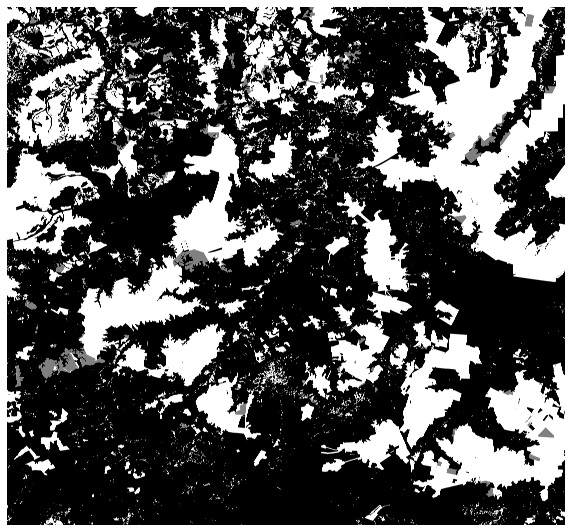

In [80]:
manager.logger.plotFigure(manager.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [81]:
manager.squeezeLabel()

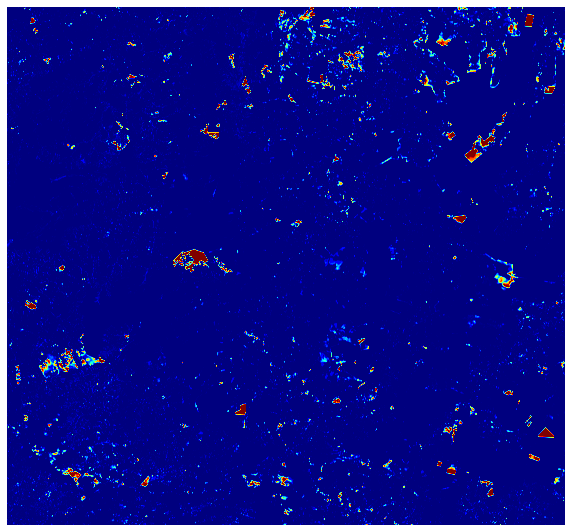

In [82]:
manager.setMeanProbNotConsideredAreas()
manager.logger.plotFigure(manager.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [83]:
print(manager.label_mask.shape)

(19355, 20840)


In [84]:
# manager.getLabelTest()

In [85]:
# manager.getMAP()

In [86]:
manager.prob_rec.shape

(19360, 20864, 10)

In [87]:
manager.preprocessProbRec()
print(manager.prob_rec.shape)

(10, 19360, 20864, 1)


In [88]:
manager.prob_rec.shape

(10, 19360, 20864, 1)

In [89]:
manager.logger.getStats(manager.prob_rec)

ic| Logger.py:121 in getStats()
    np.min(value): 1.1818724e-28
    np.mean(value): 0.020928796
    np.max(value): 1.0


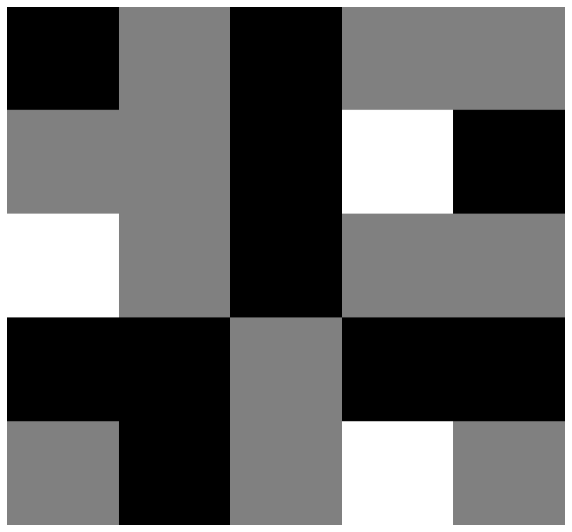

In [90]:
manager.logger.plotFigure(manager.mask_tr_val, 
            name=manager.dataset.site + manager.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [91]:
manager.getLabelCurrentDeforestation()

In [92]:
manager.applyProbabilityThreshold()

(19355, 20840)
(array([0., 1.], dtype=float32), array([397168233,   6189967], dtype=int64))


ic| base.py:413 in applyProbabilityThreshold()
    self.predicted_unpad.shape: (19355, 20840)
    self.predicted.shape: (19355, 20840)


In [93]:
manager.getTestValues()

ic| base.py:436 in getTestValues()- predicted_test.shape: (161343280,)
ic| base.py:445 in getTestValues()- predicted_test.shape: (109500189,)


In [94]:
manager.removeSmallPolygons()

ic| metrics.py:213 in removeSmallPolygonsForMetrics()
    np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([397168233,   6189967], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([397352037,   6006163], dtype=int64))
ic| metrics.py:215 in removeSmallPolygonsForMetrics()
    np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([403174396,    183804], dtype=int64))


In [95]:
manager.calculateMetrics()

ic| base.py:489 in calculateMetrics()
    self.f1: 68.0
    self.precision: 70.96
    self.recall: 65.27


In [96]:
manager.getValidationValuesForMetrics()
manager.calculateMetricsValidation()

ic| base.py:418 in getValidationValuesForMetrics()
    self.label_mask_val.shape: (48402984,)
ic| base.py:424 in getValidationValuesForMetrics()
    self.label_mask_val_valid.shape: (33237308,)
ic| base.py:500 in calculateMetricsValidation()
    f1_val: 60.64
    precision_val: 48.95
    recall_val: 79.67
    mAP_val: 77.4


In [97]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    manager.calculateMAPWithoutSmallPolygons()

In [98]:
manager.get_label_no_buffer()

D:/Jorge/datasets/deforestation/MO/deforestation_past_years.tif
Loaded deforestation past years


ic| dataset.py:561 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([305558736,   6334361,  18633582,   7843084,  10027746,   8512313,
                                                                     10416766,   5492475,   5785578,   2926723,   3841228,   3672556,
                                                                      1961590,   2715446,   5201407,   4495646], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| dataset.py:564 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([305558736,   6334361,  18633582,   7843084,  10027746,   8512313,
                                                                     10416766,   5492475,   5785578,   2926723,   3841228,   3672556,
                                                                      1961590,   2715446,   5201407,   4495646], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| dataset.py:568 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([305558736,   6334361,  18633582,   7843084,  10027746,   8512313,
                                                                     10416766,   5492475,   5785578,   2926723,   3841228,   3672556,
                                                                      1961590,   2715446,   5201407,   4495646], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/MO/deforestation_before_2000_MO.tif


ic| dataset.py:572 in loadLabelFromDate()
    np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 208], dtype=uint8), array([365488447,  37930790], dtype=int64))
ic| dataset.py:574 in loadLabelFromDate()
    np.unique(deforestation_past_years, return_counts=True): (array([   0, 2002, 2004, 2006, 2008, 2010, 2012, 2013, 2014, 2015, 2016,
                                                                    2017, 2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([305558736,   6334361,  18633582,   7843084,  10027746,   8512313,
                                                                     10416766,   5492475,   5785578,   2926723,   3841228,   3672556,
                                                                      1961590,   2715446,   5201407,   4495646], dtype=int64))
ic| dataset.py:553 in loadLabel()
    label_per_date.shape: (19357, 20841, 1)


In [99]:
manager.getErrorMask()

(array([0., 1.], dtype=float32), array([399668172,   3690028], dtype=int64))


In [100]:
manager.getErrorMaskToShowRGB()

[0. 1.]


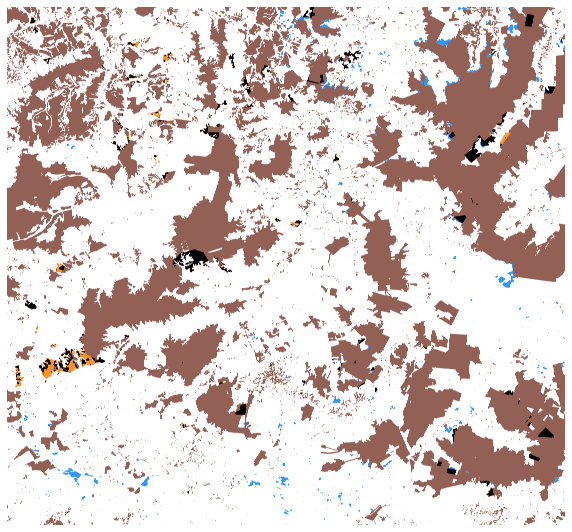

In [101]:
manager.logger.plotFigure(manager.error_mask_to_show_rgb[...,::-1], 
            name=manager.dataset.site + manager.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [102]:
'''
import types

manager.setUncertainty = types.MethodType(setUncertainty, manager)
'''


'\nimport types\n\nmanager.setUncertainty = types.MethodType(setUncertainty, manager)\n'

In [103]:
manager.setUncertainty()

In [104]:
# manager.uncertainty_map[manager.uncertainty_map>1] = 1

In [105]:
manager.logger.getStats(manager.uncertainty_map)

ic| Logger.py:121 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.00284128
    np.max(value): 0.24852832


In [106]:
manager.getUncertaintyToShow()
manager.logger.getStats(manager.uncertainty_to_show)


ic| Logger.py:121 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.0027885772
    np.max(value): 0.24852832


ic| 3944692317.py:4 in <cell line: 4>()
    manager.uncertainty_to_show.shape: (19355, 20840)


(19355, 20840)

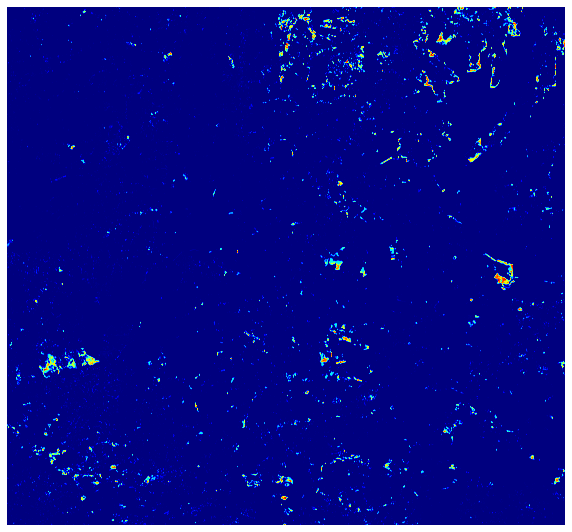

In [107]:

manager.logger.plotFigure(manager.uncertainty_to_show, 
            name=manager.dataset.site + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(manager.uncertainty_to_show.shape)



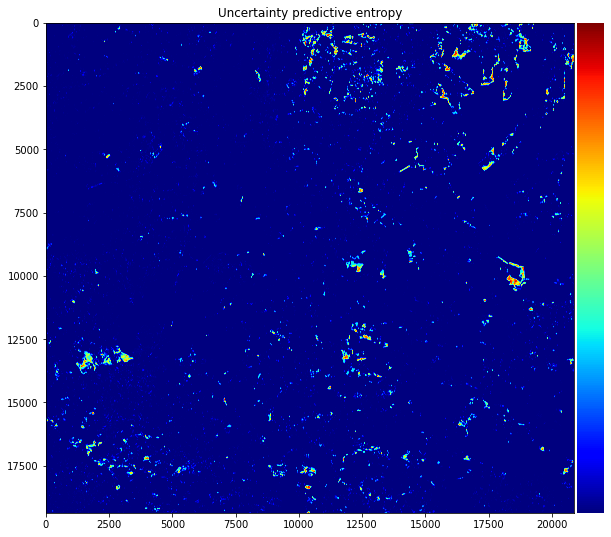

In [108]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(manager.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + manager.title_name + ' uncertainty '+manager.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [109]:
manager.getValidationValues2()
manager.getTestValues2()

ic| base.py:540 in getTestValues2()
    self.label_mask.shape: (19355, 20840)
ic| base.py:541 in getTestValues2()
    self.mask_amazon_ts.shape: (19355, 20840)
ic| base.py:545 in getTestValues2()
    self.label_mask_test.shape: (161343280,)
ic| base.py:553 in getTestValues2()
    self.error_mask_test.shape: (109421633,)


In [110]:
manager.dataset.previewLims1 = np.array([ 5500,  8500, 10000, 12500])

ic| Logger.py:165 in plotCropSample()
    manager.dataset.previewLims1: array([ 5500,  8500, 10000, 12500])
    manager.dataset.previewLims2: array([16000, 18000,  3000,  6000])
ic| Logger.py:167 in plotCropSample()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| Logger.py:169 in plotCropSample()
    np.unique(manager.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([0, 1], dtype=uint8), array([2336000, 3664000], dtype=int64))


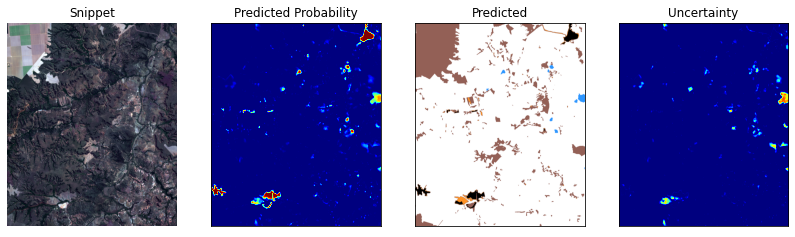

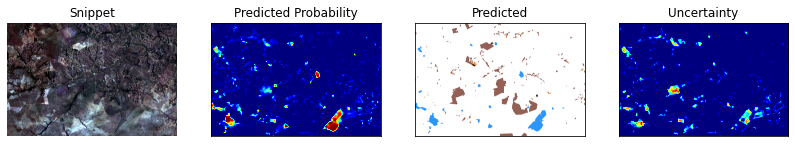

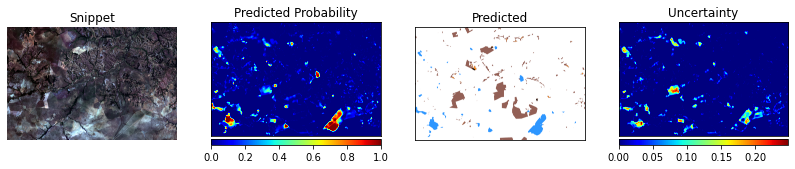

In [111]:
manager.logger.plotCropSample(manager)

In [112]:
if config["plotLandsat"] == True:
    label_tmp_dates = []
    for date in dataset.prodes_dates:
        label_tmp_date = dataset.loadLabelFromDate(date)
        label_tmp_date = label_tmp_date[:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1]]
        label_tmp_dates.append(label_tmp_date)

In [113]:
if config["plotLandsat"] == True:
    # del manager.image_stack
    import src.lansdatLoader as ll
    import importlib
    importlib.reload(ll)
    landsatLoader = ll.LandsatLoader(dataset)
    ims = landsatLoader.load()
    for idx in range(len(ims)):
        ims[idx] = ims[idx][:manager.mask_tiles.shape[0], :manager.mask_tiles.shape[1],:]
    ims = landsatLoader.darken_past_deforestation(ims, manager.label_no_buffer)
    ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

In [114]:
if config["plotLandsat"] == True:
    logger.plotCropSampleLandsat(manager, ims)

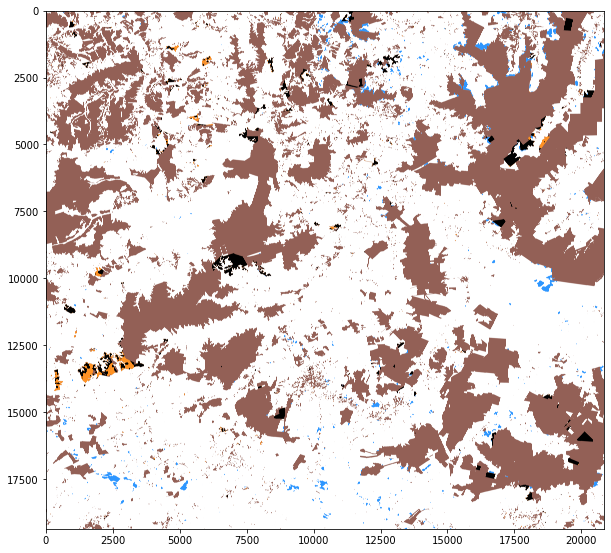

In [115]:
plt.figure(figsize=(10, 10))
plt.imshow(manager.error_mask_to_show_rgb[...,::-1])


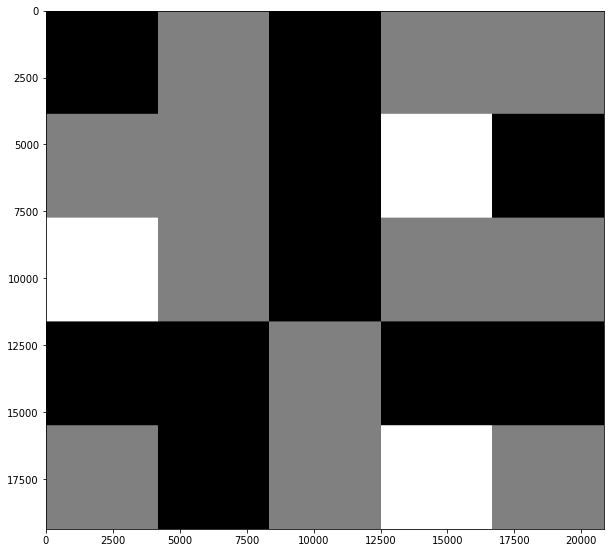

In [116]:
plt.figure(figsize=(10, 10))
plt.imshow(manager.mask_tr_val, cmap='gray')

In [133]:
manager.dataset.previewLims1 = np.array([230, 500, 2230, 2500])
manager.dataset.previewLims2 = np.array([12500, 15000, 15000, 17500])
manager.dataset.previewLims2 = np.array([4000, 5000, 18000, None])
manager.dataset.previewLims2 = np.array([3000, 7000, 16000, None])


# PI
manager.dataset.previewLims2 = np.array([5000, 7500, 12500, 15000])
manager.dataset.previewLims1 = np.array([17000, 18000, 5000, 7500])
manager.dataset.previewLims2 = np.array([5000, 7500, 10000, 12500])

# MA

manager.dataset.previewLims1 = np.array([17000, 18000, 5000, 7500])
manager.dataset.previewLims2 = np.array([12500, 15000, 2000, 3000])


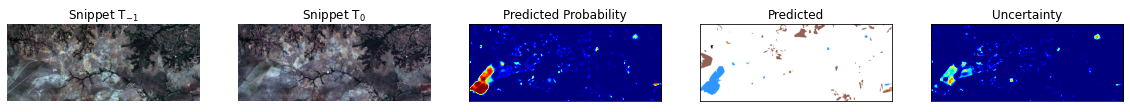

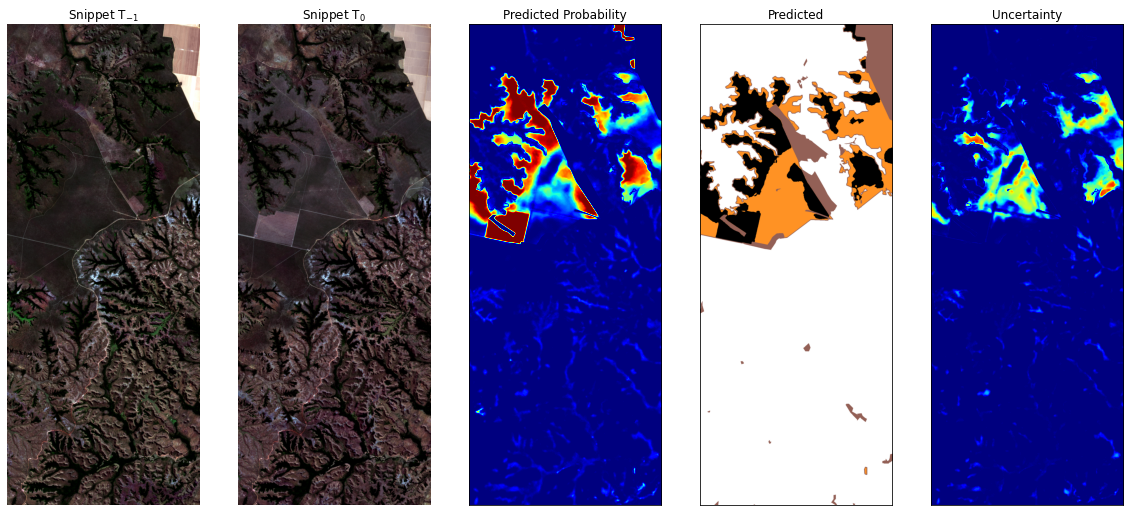

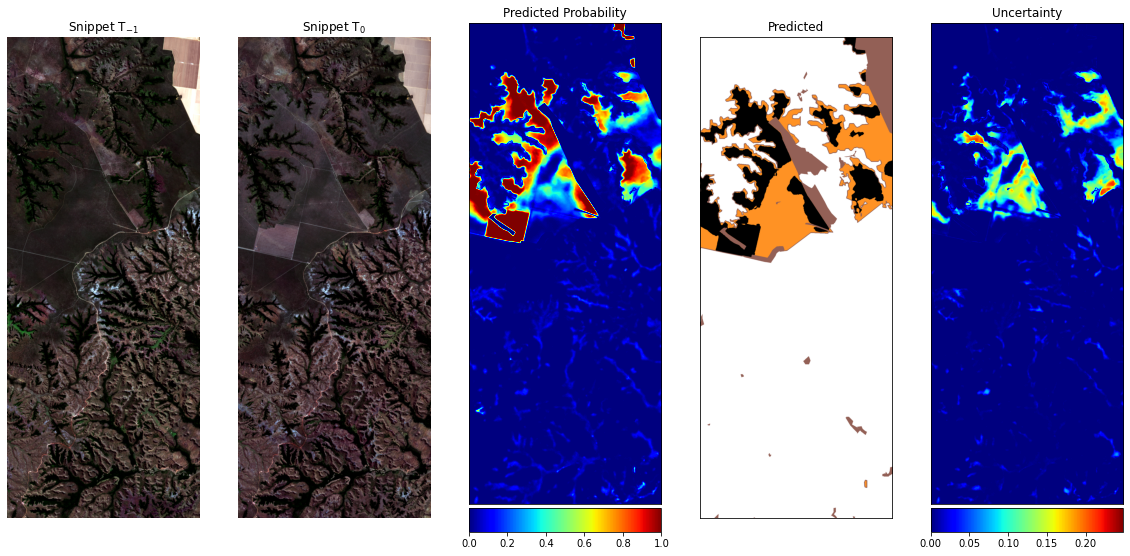

In [134]:
manager.logger.plotCropSampleT0T1(manager)

In [119]:
manager.logger.getStats(manager.uncertainty)


ic| Logger.py:121 in getStats()
    np.min(value): 0.0
    np.mean(value): 0.0038492444
    np.max(value): 0.24852832


In [120]:
'''
manager.getOtherUncertaintyMetrics()
print(manager.sUEO)

print(manager.ece_score)  
'''

'\nmanager.getOtherUncertaintyMetrics()\nprint(manager.sUEO)\n\nprint(manager.ece_score)  \n'

In [121]:
if config["plotPOI"] == True and config['site'] == 'PA':

    print(manager.mean_prob.shape)
    font = {'family': "Times New Roman",
            'color':  'white',
            'weight': 'bold',
            'size': 24,
            }

    lims = dataset.previewLims1
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['A', 'B', 'C', 'D', 'E', 'F']

    for poi_id in range(4):
            
            plt.text(manager.dataset.snippet_coords['snippet_id0'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id0'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')

    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi0.png'), 
    dpi=150, bbox_inches='tight')

    lims = dataset.previewLims2
    im = manager.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
    plt.figure(figsize=(10,10))
    plt.imshow(im, cmap='jet')

    letters = ['E', 'F']

    print(manager.dataset.snippet_coords['snippet_id1'])
    for poi_id in range(2):
            
            plt.text(manager.dataset.snippet_coords['snippet_id1'][poi_id][1], 
                    manager.dataset.snippet_coords['snippet_id1'][poi_id][0], 
                    letters[poi_id], fontdict=font)
    plt.axis('off')
            
    plt.savefig(os.path.join('output/pdf_plot_results', 
                            'pdf_plot_poi1.png'), 
    dpi=150, bbox_inches='tight')

In [122]:
if config["plotPOI"] == True and config['site'] == 'PA':
    manager.getPOIValues()


In [123]:

if config["plotPOI"] == True and config['site'] == 'PA':
    import pickle
    with open('output/log/log_ensemble_.pkl', 'wb') as f:
                pickle.dump(manager.snippet_poi_results, f)


In [124]:
from src import metrics as _metrics

def getUncertaintyAAValues(self):



    # self.threshold_list = [0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36]

    # self.threshold_list = [0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36, np.max(uncertainty)-0.003]
    if self.config['uncertainty_method'] == "pred_entropy_single":
        self.threshold_list = [0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    if self.config['uncertainty_method'] == "pred_entropy":
            if self.classes_mode == False:
                    self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                            0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    # self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                    #         0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
            else:
                    self.threshold_list = [0.0025, 0.025, 0.05, 0.075, 0.1, 0.2, 0.4, 
                    0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                    
                    # self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    # 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
    elif self.config['uncertainty_method'] == "pred_var":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.13/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.0015, np.max(self.uncertainty)-0.0008]
            self.threshold_list = np.linspace(np.min(self.uncertainty) + 0.000015, np.max(self.uncertainty) - 0.0015, 19)
    elif self.config['uncertainty_method'] == "MI":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*0.235/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
    elif self.config['uncertainty_method'] == "KL":
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.006, np.max(self.uncertainty)-0.003]
    elif self.config['uncertainty_method'] == "evidential":
            # self.threshold_list = [0.015, 0.03, 0.04]
            self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36]
            self.threshold_list = [ 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                    0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

            # self.threshold_list = [ 0.15, 0.2,  
            #          0.3, 0.35, 0.4, 0.5, 0.6, 0.7]

            # self.threshold_list = [0.015,0.1, 0.2, 0.27, 0.36, 0.45, 0.55, 0.65]

            # self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(uncertainty)-0.006, np.max(uncertainty)-0.003]
                    
            # self.threshold_list = np.linspace(np.min(uncertainty) + 0.0015, np.max(uncertainty) - 0.0015, 19)
    print(self.threshold_list)
    self.loadThresholdMetrics = False
    if self.loadThresholdMetrics == False:
            # self.threshold_list = [0.1]
            # y_test
            ic(self.uncertainty.shape, self.label_mask_current_deforestation_test.shape)

            metrics_values = _metrics.getAA_Recall(self.uncertainty, 
                    self.label_mask_current_deforestation_test, 
                    self.predicted_test, self.threshold_list)

            # ic(metrics_values)


    self.m = {'precision_L': metrics_values[:,0],
            'recall_L': metrics_values[:,1],
            'recall_Ltotal': metrics_values[:,2],
            'AA': metrics_values[:,3],
            'precision_H': metrics_values[:,4],
            'recall_H': metrics_values[:,5],
            'UEO': metrics_values[:,6]}

    self.m['f1_L'] = 2*self.m['precision_L']*self.m['recall_L']/(self.m['precision_L']+self.m['recall_L'])
    self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [125]:

import types

manager.getUncertaintyAAValues = types.MethodType(getUncertaintyAAValues, manager)



Get precision-recall threshold

In [126]:

manager.getUncertaintyAAValues()

ic| 1409948429.py:63 in getUncertaintyAAValues()
    self.uncertainty.shape: (109421633,)
    self.label_mask_current_deforestation_test.shape: (109421633,)


[1.50000000e-05 1.37379620e-02 2.74609241e-02 4.11838861e-02
 5.49068481e-02 6.86298102e-02 8.23527722e-02 9.60757342e-02
 1.09798696e-01 1.23521658e-01 1.37244620e-01 1.50967582e-01
 1.64690544e-01 1.78413506e-01 1.92136468e-01 2.05859431e-01
 2.19582393e-01 2.33305355e-01 2.47028317e-01]
threshold 1.5e-05


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (23899206,)
    predicted_test_classified_incorrect.shape: (23899206,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 23899206
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 23899206
    len(label_mask_current_deforestation_test): 109421633


[0.9361296  0.87269016 0.29055908 0.2184139  0.59419368 0.54293904
 0.05376173]
threshold 0.013737962034278446


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (4878449,)
    predicted_test_classified_incorrect.shape: (4878449,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4878449
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 4878449
    len(label_mask_current_deforestation_test): 109421633


[0.89188492 0.7532599  0.45036766 0.04458395 0.48769185 0.5032493
 0.1803563 ]
threshold 0.027460924068556894


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3885064,)
    predicted_test_classified_incorrect.shape: (3885064,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3885064
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3885064
    len(label_mask_current_deforestation_test): 109421633


[0.87921755 0.73147881 0.47804891 0.03550545 0.46435523 0.50418053
 0.19637706]
threshold 0.04118388610283534


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3315546,)
    predicted_test_classified_incorrect.shape: (3315546,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3315546
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3315546
    len(label_mask_current_deforestation_test): 109421633


[0.86948939 0.71740176 0.49392339 0.03030064 0.4513611  0.50979013
 0.20517499]
threshold 0.05490684813711379


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2895090,)
    predicted_test_classified_incorrect.shape: (2895090,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2895090
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2895090
    len(label_mask_current_deforestation_test): 109421633


[0.85871659 0.70712244 0.50696004 0.02645811 0.44235526 0.5149626
 0.20982143]
threshold 0.06862981017139223


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2532314,)
    predicted_test_classified_incorrect.shape: (2532314,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2532314
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2532314
    len(label_mask_current_deforestation_test): 109421633


[0.84491585 0.69950101 0.52075922 0.02314272 0.43474871 0.51645811
 0.21065246]
threshold 0.08235277220567068


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2166759,)
    predicted_test_classified_incorrect.shape: (2166759,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2166759
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2166759
    len(label_mask_current_deforestation_test): 109421633


[0.82829472 0.69217338 0.5351458  0.01980193 0.42942215 0.51830141
 0.20831814]
threshold 0.09607573423994913


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1624043,)
    predicted_test_classified_incorrect.shape: (1624043,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1624043
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1624043
    len(label_mask_current_deforestation_test): 109421633


[0.80605429 0.68256159 0.55085069 0.01484207 0.43076217 0.52795845
 0.20851273]
threshold 0.10979869627422757


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1379514,)
    predicted_test_classified_incorrect.shape: (1379514,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1379514
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1379514
    len(label_mask_current_deforestation_test): 109421633


[0.79329029 0.67563077 0.56440637 0.01260732 0.42376529 0.53651131
 0.19496651]
threshold 0.12352165830850602


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1155770,)
    predicted_test_classified_incorrect.shape: (1155770,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1155770
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1155770
    len(label_mask_current_deforestation_test): 109421633


[0.78090369 0.66918008 0.57808936 0.01056254 0.41555081 0.5483218
 0.17676163]
threshold 0.13724462034278445


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (930229,)
    predicted_test_classified_incorrect.shape: (930229,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 930229
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 930229
    len(label_mask_current_deforestation_test): 109421633


[0.76812373 0.66296587 0.59268398 0.00850133 0.40489133 0.56639721
 0.1529387 ]
threshold 0.1509675823770629


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (686419,)
    predicted_test_classified_incorrect.shape: (686419,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 686419
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 686419
    len(label_mask_current_deforestation_test): 109421633


[0.75472138 0.65741807 0.60825431 0.00627316 0.39024354 0.59470915
 0.12353407]
threshold 0.16469054441134134


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (443671,)
    predicted_test_classified_incorrect.shape: (443671,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 443671
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 443671
    len(label_mask_current_deforestation_test): 109421633


[0.74112937 0.6565831  0.62726738 0.00405469 0.3462658  0.57025173
 0.09129328]
threshold 0.1784135064456198


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (303350,)
    predicted_test_classified_incorrect.shape: (303350,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 303350
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 303350
    len(label_mask_current_deforestation_test): 109421633


[0.73309746 0.65541194 0.63854271 0.0027723  0.29023292 0.55115353
 0.06627261]
threshold 0.19213646847989824


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (176222,)
    predicted_test_classified_incorrect.shape: (176222,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 176222
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 176222
    len(label_mask_current_deforestation_test): 109421633


[0.72475025 0.65451957 0.64720703 0.00161049 0.20533147 0.49420717
 0.04077244]
threshold 0.20585943051417668


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (81104,)
    predicted_test_classified_incorrect.shape: (81104,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 81104
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 81104
    len(label_mask_current_deforestation_test): 109421633


[0.71823816 0.65371994 0.65181089 0.00074121 0.07409707 0.31421884
 0.02119033]
threshold 0.21958239254845513


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (35541,)
    predicted_test_classified_incorrect.shape: (35541,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 35541
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 35541
    len(label_mask_current_deforestation_test): 109421633


[7.13515192e-01 6.53258393e-01 6.52718677e-01 3.24807801e-04
 1.92484727e-03 1.18924509e-02 9.47723498e-03]
threshold 0.23330535458273358


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (11578,)
    predicted_test_classified_incorrect.shape: (11578,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 11578
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 11578
    len(label_mask_current_deforestation_test): 109421633


[7.11109084e-01 6.52888875e-01 6.52728502e-01 1.05810887e-04
 0.00000000e+00 0.00000000e+00 3.63132185e-03]
threshold 0.24702831661701202


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (439,)
    predicted_test_classified_incorrect.shape: (439,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:297: RuntimeWarning: invalid value encountered in longlong_scalars
  recall_H = TP_H / (TP_H + FN_H)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 439
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 439
    len(label_mask_current_deforestation_test): 109421633


[7.09647305e-01 6.52728502e-01 6.52728502e-01 4.01200373e-06
 0.00000000e+00            nan 1.70314526e-04]


C:\Users\jchamorro\AppData\Local\Temp\ipykernel_8212\1409948429.py:81: RuntimeWarning: invalid value encountered in true_divide
  self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [127]:
manager.getUncertaintyAAAuditedValues()

ic| base.py:682 in getUncertaintyAAAuditedValues()
    self.uncertainty.shape: (109421633,)
    self.label_mask_current_deforestation_test.shape: (109421633,)


threshold 1.5e-05
(109421633,) (109421633,)
cm_audited [[107034364     46406]
 [    99223   2241640]]
[0.97971807 0.95761264]
threshold 0.013737962034278446
(109421633,) (109421633,)
cm_audited [[106952973    127797]
 [   345333   1995530]]
[0.93981285 0.8524762 ]
threshold 0.027460924068556894
(109421633,) (109421633,)
cm_audited [[106927041    153729]
 [   410795   1930068]]
[0.9262265 0.8245113]
threshold 0.04118388610283534
(109421633,) (109421633,)
cm_audited [[106907223    173547]
 [   455452   1885411]]
[0.91571125 0.80543415]
threshold 0.05490684813711379
(109421633,) (109421633,)
cm_audited [[106885520    195250]
 [   491520   1849343]]
[0.90450422 0.79002616]
threshold 0.06862981017139223
(109421633,) (109421633,)
cm_audited [[106857018    223752]
 [   523682   1817181]]
[0.89036779 0.77628678]
threshold 0.08235277220567068
(109421633,) (109421633,)
cm_audited [[106821085    259685]
 [   557108   1783755]]
[0.87291773 0.76200743]
threshold 0.09607573423994913
(109421633,) (10

ic| base.py:688 in getUncertaintyAAAuditedValues()
    metric_values_audited: array([[0.97971807, 0.95761264],
                                  [0.93981285, 0.8524762 ],
                                  [0.9262265 , 0.8245113 ],
                                  [0.91571125, 0.80543415],
                                  [0.90450422, 0.79002616],
                                  [0.89036779, 0.77628678],
                                  [0.87291773, 0.76200743],
                                  [0.84875931, 0.74381628],
                                  [0.83213203, 0.72902942],
                                  [0.81493362, 0.71421224],
                                  [0.79613331, 0.69869531],
                                  [0.77554842, 0.68303741],
                                  [0.75410141, 0.6719163 ],
                                  [0.74075798, 0.66428108],
                                  [0.72815134, 0.65837941],
                                  [0.71914193, 0.

cm_audited [[106455609    625161]
 [   812915   1527948]]
[0.70964731 0.6527285 ]


In [128]:
manager.setPlotLimsForUncertaintyAA()

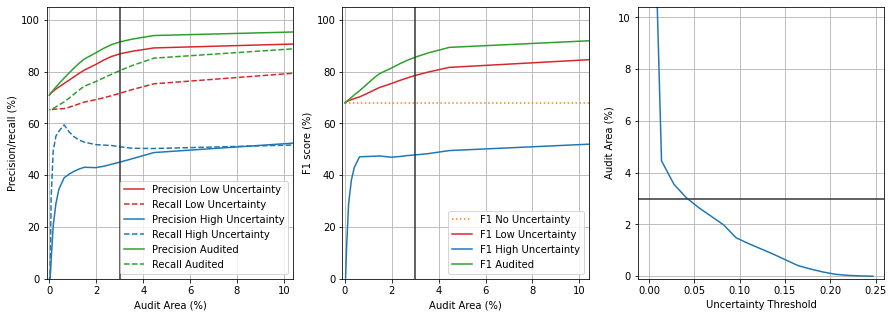

In [129]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
manager.plotUncertaintyAA(normalize_xlim=False)

In [130]:
from scipy import optimize  


In [131]:
manager.getOptimalUncertaintyThreshold(bounds=(np.min(manager.uncertainty) + 0.000015, np.max(manager.uncertainty) - 0.0015))

ic| base.py:791 in getOptimalUncertaintyThreshold()
    bounds: (1.5e-05, 0.24702831661701202)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.0943656912738594
threshold 0.0943656912738594


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (1657957,)
    predicted_test_classified_incorrect.shape: (1657957,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1657957
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 1657957
    len(label_mask_current_deforestation_test): 109421633


[0.80776509 0.6834599  0.54905947 0.015152   0.43164706 0.52718303
 0.20991037]
0.1526776253431526
threshold 0.1526776253431526


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (653762,)
    predicted_test_classified_incorrect.shape: (653762,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 653762
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 653762
    len(label_mask_current_deforestation_test): 109421633


[0.75266751 0.65690529 0.61013011 0.00597471 0.3898317  0.59824696
 0.11933559]
0.05832693406929323
threshold 0.05832693406929323


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (2801241,)
    predicted_test_classified_incorrect.shape: (2801241,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2801241
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 2801241
    len(label_mask_current_deforestation_test): 109421633


[0.85566656 0.70497857 0.51034341 0.02560043 0.44018077 0.51572613
 0.21037282]
0.03605375720456619
threshold 0.03605375720456619


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3502128,)
    predicted_test_classified_incorrect.shape: (3502128,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3502128
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3502128
    len(label_mask_current_deforestation_test): 109421633


[0.87303987 0.72203375 0.48868815 0.03200581 0.45548696 0.50758477
 0.20238337]
0.03001586812805898
threshold 0.03001586812805898


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3759587,)
    predicted_test_classified_incorrect.shape: (3759587,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3759587
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3759587
    len(label_mask_current_deforestation_test): 109421633


[0.87735498 0.7285284  0.48155403 0.03435872 0.46135282 0.50493282
 0.19844425]
0.04413031702878713
threshold 0.04413031702878713


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3217462,)
    predicted_test_classified_incorrect.shape: (3217462,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3217462
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3217462
    len(label_mask_current_deforestation_test): 109421633


[0.86735284 0.71502837 0.49679328 0.02940426 0.4492154  0.51090825
 0.2065393 ]
0.04582002397755346
threshold 0.04582002397755346


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3163543,)
    predicted_test_classified_incorrect.shape: (3163543,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3163543
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3163543
    len(label_mask_current_deforestation_test): 109421633


[0.86609489 0.71374795 0.49838927 0.0289115  0.44807012 0.51151553
 0.20726384]
0.0419206707570981
threshold 0.0419206707570981


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3290361,)
    predicted_test_classified_incorrect.shape: (3290361,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3290361
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3290361
    len(label_mask_current_deforestation_test): 109421633


[0.86893875 0.71678934 0.49463809 0.03007048 0.450845   0.51009176
 0.20552975]
0.0396797091890883
threshold 0.0396797091890883


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3367789,)
    predicted_test_classified_incorrect.shape: (3367789,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3367789
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3367789
    len(label_mask_current_deforestation_test): 109421633


[0.8704644  0.71866606 0.49237738 0.03077809 0.45265162 0.50925618
 0.20438551]
0.04206974479160135
threshold 0.04206974479160135


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3285311,)
    predicted_test_classified_incorrect.shape: (3285311,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3285311
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3285311
    len(label_mask_current_deforestation_test): 109421633


[0.8688236  0.71668871 0.49478632 0.03002433 0.45073855 0.51011339
 0.2056122 ]
0.04257800388347066
threshold 0.04257800388347066


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3268319,)
    predicted_test_classified_incorrect.shape: (3268319,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3268319
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3268319
    len(label_mask_current_deforestation_test): 109421633


[0.86844895 0.71627374 0.49527674 0.02986904 0.45038058 0.51031716
 0.2058463 ]
0.042263882489604276
threshold 0.042263882489604276


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3278718,)
    predicted_test_classified_incorrect.shape: (3278718,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3278718
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3278718
    len(label_mask_current_deforestation_test): 109421633


[0.86867556 0.71652327 0.49497514 0.02996407 0.45060401 0.51020044
 0.20569923]
0.04213905720598636
threshold 0.04213905720598636


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3282974,)
    predicted_test_classified_incorrect.shape: (3282974,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3282974
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3282974
    len(label_mask_current_deforestation_test): 109421633


[0.86876948 0.71662357 0.49485126 0.03000297 0.450695   0.51015636
 0.20563854]
0.04217239116434292
threshold 0.04217239116434292


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3281816,)
    predicted_test_classified_incorrect.shape: (3281816,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3281816
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3281816
    len(label_mask_current_deforestation_test): 109421633


[0.86873901 0.71659299 0.49488586 0.02999239 0.45067317 0.51017272
 0.20565009]
0.0421057232476298
threshold 0.0421057232476298


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3284095,)
    predicted_test_classified_incorrect.shape: (3284095,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3284095
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3284095
    len(label_mask_current_deforestation_test): 109421633
ic| base.py:795 in getOptimalUncertaintyThreshold()
    self.threshold_optimal: 0.04213905720598636


[0.86879452 0.71665563 0.49482135 0.03001322 0.45071496 0.51013327
 0.20562555]


In [132]:
manager.getUncertaintyMetricsFromOptimalThreshold()

threshold:  0.04213905720598636
threshold 0.04213905720598636


ic| metrics.py:267 in getAA_Recall()
    label_current_deforestation_test_classified_incorrect.shape: (3282974,)
    predicted_test_classified_incorrect.shape: (3282974,)
ic| metrics.py:300 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3282974
    len(label_mask_current_deforestation_test): 109421633
ic| metrics.py:302 in getAA_Recall()
    TP_H + FN_H + FP_H + TN_H: 3282974
    len(label_mask_current_deforestation_test): 109421633


[0.86876948 0.71662357 0.49485126 0.03000297 0.450695   0.51015636
 0.20563854]
threshold 0.04213905720598636
(109421633,) (109421633,)


ic| base.py:826 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_optimal: {'AA': array([0.03000297]),
                     'UEO': array([0.20563854]),
                     'f1': 68.0,
                     'f1_H': array([0.47858583]),
                     'f1_L': array([0.78539601]),
                     'precision_H': array([0.450695]),
                     'precision_L': array([0.86876948]),
                     'recall_H': array([0.51015636]),
                     'recall_L': array([0.71662357]),
                     'recall_Ltotal': array([0.49485126])}
ic| base.py:827 in getUncertaintyMetricsFromOptimalThreshold()
    self.m_audited_optimal: {'f1': array([0.85608331]),
                             'precision': array([0.91496803]),
                             'recall': array([0.8043196])}


cm_audited [[106905793    174977]
 [   458061   1882802]]
[0.91496803 0.8043196 ]


{'metrics': {'precision_L': array([0.86876948]),
  'recall_L': array([0.71662357]),
  'recall_Ltotal': array([0.49485126]),
  'AA': array([0.03000297]),
  'precision_H': array([0.450695]),
  'recall_H': array([0.51015636]),
  'UEO': array([0.20563854]),
  'f1_L': array([0.78539601]),
  'f1_H': array([0.47858583]),
  'f1': 68.0},
 'metrics_audited': {'precision': array([0.91496803]),
  'recall': array([0.8043196]),
  'f1': array([0.85608331])},
 'exp': 19}